In [1]:
from tqdm import tqdm
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader
import cv2
import torchvision.transforms as transforms

In [2]:
class CustomImageDataset(Dataset):
    def read_data_set(self):
        all_img_files = []
        all_mask_files = []

        img_lists = img_files = self.img_lists
        mask_lists = img_files = self.mask_lists

        print("Read imge data from " + self.img_path)
        task1 = tqdm(img_lists)

        for img_file in task1:
            img_file = os.path.join(self.img_path, img_file)
            img = cv2.imread(img_file, 0)
            if img is not None:
                all_img_files.append(img_file)
            else:
                print("ERROR : Not found " + img_file)

        print("Read mask data from " + self.mask_path)
        task2 = tqdm(mask_lists)

        for mask_file in task2:
            mask_file = os.path.join(self.mask_path, mask_file)
            mask = cv2.imread(mask_file, 0)
            if mask is not None:
                all_mask_files.append(mask_file)
            else:
                print("ERROR : Not found " + mask_file)

        print("\nNunber of image : " + str(len(all_img_files)))
        print("Nunber of mask : " + str(len(all_mask_files)))

        if len(all_img_files) != len(all_mask_files):
            print("\nERROR : Number of data mismatch")
        else:
            print("\nComplete!")

        return all_img_files, all_mask_files, len(all_img_files), len(all_mask_files)

    def __init__(self, img_path, mask_path, img_lists, mask_lists, transforms=None):
        print("### Initialize Custom Dataset ###\n")

        self.img_path = img_path
        self.mask_path = mask_path
        self.img_lists = img_lists
        self.mask_lists = mask_lists
        self.image_files_path, self.mask_files_path, self.img_length, self.mask_length = self.read_data_set()
        self.transforms = transforms

        self.length = self.img_length

    def __getitem__(self, index):
        image = cv2.imread(self.image_files_path[index], 0)
        image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_CUBIC)
        mask = cv2.imread(self.mask_files_path[index], 0)
        mask = cv2.resize(mask, (256, 256), interpolation=cv2.INTER_CUBIC)

        if self.transforms is not None:
            image = self.transforms(image)
            mask = self.transforms(mask)

        return {'image': image, 'mask': mask}

    def __len__(self):
        return self.length

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from split import split_img_set

In [4]:
transform = transforms.Compose([transforms.ToTensor()])
img_path="./Crop_Centered/image"
mask_path="./Crop_Centered/mask"

val_num = 2000
test_num = 4000

val_img_lung, val_img_lists, test_img_lung, test_img_lists, train_img_lung, train_img_lists = split_img_set(img_path, mask_path, val_num, test_num)
val_set = CustomImageDataset(img_path=img_path, mask_path=mask_path, img_lists=val_img_lists, mask_lists=val_img_lists, transforms=transform)
test_set = CustomImageDataset(img_path=img_path, mask_path=mask_path, img_lists=test_img_lists, mask_lists=test_img_lists, transforms=transform)
train_set = CustomImageDataset(img_path=img_path, mask_path=mask_path, img_lists=train_img_lists, mask_lists=train_img_lists, transforms=transform)

 41%|████      | 826/2024 [00:00<00:00, 8254.50it/s]

2024 4004 17340
### Initialize Custom Dataset ###

Read imge data from ./Crop_Centered/image


  0%|          | 0/4004 [00:00<?, ?it/s]

Read mask data from ./Crop_Centered/mask

Nunber of image : 2024
Nunber of mask : 2024

Complete!
### Initialize Custom Dataset ###

Read imge data from ./Crop_Centered/image


 48%|████▊     | 1904/4004 [00:00<00:00, 19034.57it/s]

Read mask data from ./Crop_Centered/mask


  5%|▍         | 828/17340 [00:00<00:01, 8274.78it/s]


Nunber of image : 4004
Nunber of mask : 4004

Complete!
### Initialize Custom Dataset ###

Read imge data from ./Crop_Centered/image


 11%|█         | 1846/17340 [00:00<00:00, 18452.41it/s]

Read mask data from ./Crop_Centered/mask


100%|██████████| 17340/17340 [00:00<00:00, 18543.00it/s]


Nunber of image : 17340
Nunber of mask : 17340

Complete!


In [5]:
print(len(train_set) + len(test_set) + len(val_set))

23368


In [6]:
print(val_img_lung)

['024', '032', '046', '052', '055', '099', '100', '122', '144', '146', '162', '177', '180', '217', '230', '241', '319', '341', '350', '352', '359', '368', '379', '389', '397', '401', '402', '411', '417']


In [7]:
print(test_img_lung)

['004', '008', '011', '030', '036', '045', '067', '075', '079', '082', '107', '114', '129', '136', '137', '139', '140', '160', '164', '173', '174', '179', '182', '192', '193', '199', '201', '206', '209', '214', '220', '222', '224', '225', '227', '234', '235', '240', '242', '255', '257', '267', '269', '285', '298', '320', '321', '328', '329', '330', '336', '340', '344', '353', '357', '358', '360', '361', '406', '413']


In [8]:
print(train_img_lung)

['001', '002', '003', '005', '006', '007', '009', '010', '012', '013', '015', '016', '017', '018', '019', '020', '022', '023', '025', '026', '028', '029', '031', '033', '034', '035', '037', '038', '039', '040', '041', '042', '043', '044', '047', '048', '049', '051', '053', '054', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '068', '069', '070', '071', '072', '073', '074', '076', '077', '078', '080', '081', '083', '084', '087', '088', '090', '091', '092', '093', '094', '096', '097', '101', '102', '103', '104', '105', '106', '109', '112', '113', '115', '116', '117', '118', '120', '121', '123', '124', '125', '126', '127', '131', '132', '135', '141', '142', '143', '145', '147', '148', '149', '150', '151', '152', '153', '154', '155', '157', '159', '163', '165', '166', '168', '169', '170', '171', '172', '175', '176', '181', '183', '184', '185', '186', '187', '189', '190', '191', '196', '197', '198', '202', '203', '204', '205', '207', '208', '210', '211', '212'

In [9]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4, shuffle=True)

In [10]:
import matplotlib.pyplot as plt

plot_size = 3
plot_num = 5

for num, item in enumerate(train_loader):
    images = item['image']
    masks = item['mask']

    images = images.numpy()
    masks = masks.numpy()

    fig = plt.figure()

    for i in range(plot_size):
        ax = fig.add_subplot(1, plot_size, i + 1)
        image = images[i].squeeze()
        ax.imshow(image, 'gray')
        ax.set_xticks([]), ax.set_yticks([])
        i += 1

    fig = plt.figure()

    for i in range(plot_size):
        ax = fig.add_subplot(1, plot_size, i + 1)
        image = masks[i].squeeze()
        ax.imshow(image)
        ax.set_xticks([]), ax.set_yticks([])
        i += 1

    if num > plot_num:
        break

In [11]:
def conv_block(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_dim),
        act_fn,
    )
    return model

def conv_trans_block(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        nn.ConvTranspose2d(in_dim,out_dim, kernel_size=3, stride=2, padding=1,output_padding=1),
        nn.BatchNorm2d(out_dim),
        act_fn,
    )
    return model

def maxpool():
    pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    return pool

def conv_block_2(in_dim,out_dim,act_fn):
    model = nn.Sequential(
        conv_block(in_dim,out_dim,act_fn),
        nn.Conv2d(out_dim,out_dim, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_dim),
    )
    return model

In [12]:
class UnetGenerator(nn.Module):
    def __init__(self,in_dim,out_dim,num_filter):
        super(UnetGenerator,self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.num_filter = num_filter
        act_fn = nn.LeakyReLU(0.2, inplace=True)

        self.down_1 = conv_block_2(self.in_dim,self.num_filter,act_fn)
        self.pool_1 = maxpool()
        self.down_2 = conv_block_2(self.num_filter*1,self.num_filter*2,act_fn)
        self.pool_2 = maxpool()
        self.down_3 = conv_block_2(self.num_filter*2,self.num_filter*4,act_fn)
        self.pool_3 = maxpool()
        self.down_4 = conv_block_2(self.num_filter*4,self.num_filter*8,act_fn)
        self.pool_4 = maxpool()

        self.bridge = conv_block_2(self.num_filter*8,self.num_filter*16,act_fn)

        self.trans_1 = conv_trans_block(self.num_filter*16,self.num_filter*8,act_fn)
        self.up_1 = conv_block_2(self.num_filter*16,self.num_filter*8,act_fn)
        self.trans_2 = conv_trans_block(self.num_filter*8,self.num_filter*4,act_fn)
        self.up_2 = conv_block_2(self.num_filter*8,self.num_filter*4,act_fn)
        self.trans_3 = conv_trans_block(self.num_filter*4,self.num_filter*2,act_fn)
        self.up_3 = conv_block_2(self.num_filter*4,self.num_filter*2,act_fn)
        self.trans_4 = conv_trans_block(self.num_filter*2,self.num_filter*1,act_fn)
        self.up_4 = conv_block_2(self.num_filter*2,self.num_filter*1,act_fn)

        self.out = nn.Sequential(
            nn.Conv2d(self.num_filter,self.out_dim,3,1,1),
            nn.ReLU(),
        )

    def forward(self,input):
        down_1 = self.down_1(input)
        pool_1 = self.pool_1(down_1)
        down_2 = self.down_2(pool_1)
        pool_2 = self.pool_2(down_2)
        down_3 = self.down_3(pool_2)
        pool_3 = self.pool_3(down_3)
        down_4 = self.down_4(pool_3)
        pool_4 = self.pool_4(down_4)

        bridge = self.bridge(pool_4)

        trans_1 = self.trans_1(bridge)
        concat_1 = torch.cat([trans_1,down_4],dim=1)
        up_1 = self.up_1(concat_1)
        trans_2 = self.trans_2(up_1)
        concat_2 = torch.cat([trans_2,down_3],dim=1)
        up_2 = self.up_2(concat_2)
        trans_3 = self.trans_3(up_2)
        concat_3 = torch.cat([trans_3,down_2],dim=1)
        up_3 = self.up_3(concat_3)
        trans_4 = self.trans_4(up_3)
        concat_4 = torch.cat([trans_4,down_1],dim=1)
        up_4 = self.up_4(concat_4)
        out = self.out(up_4)
        return out

In [13]:
net = UnetGenerator(in_dim=1,out_dim=1,num_filter=16)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)

cuda:0


UnetGenerator(
  (down_1): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (down_2): Sequential(
    (0): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool_2): Max

In [14]:
def get_val_loss_and_acc(val_loader):
    val_loss = 0
    DSC = 0

    with torch.no_grad():
        for j, val_data in enumerate(val_loader, 0):
            val_image = val_data['image']
            val_label = val_data['mask']
            val_image, val_label = val_image.to(device), val_label.to(device)
            val_outputs = net(val_image)
                        
            val_loss += criterion(val_outputs, val_label)

            DSC += get_DSC_acc(val_label, val_outputs)

    return val_loss, DSC

In [15]:
def get_DSC_acc(val_label, val_outputs):
        with torch.no_grad():
                GT = val_label.clone().detach()
                GT = GT.cpu().numpy()
                GT[GT > 0.5] = 1
                GT[GT <= 0.5] = 0

                AUTO = val_outputs.clone().detach()
                AUTO = AUTO.cpu().numpy()
                AUTO[AUTO > 0.5] = 1
                AUTO[AUTO <= 0.5] = 0

                A_Intersect_G = np.multiply(AUTO, GT)
                
                DSC = (2 * np.sum(A_Intersect_G)) / (np.sum(AUTO) + np.sum(GT))

        return DSC

In [16]:
def train(epochs, mini_batch, txt_logger=False, model_save=False, early_stopping=False):
    train_losses, val_losses, DSC_acc = [], [], []

    current_lr = 1
    target_lr = 1e-6

    if txt_logger == True:
        f = open("./models/logger.txt", 'w')

    for epoch in range(epochs):
        running_loss = 0
        val_loss = 0

        task = tqdm(train_loader)
        
        for i, data in enumerate(task):
            inputs, labels = data['image'].to(device), data['mask'].to(device)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if i % mini_batch == mini_batch - 1:
                with torch.no_grad():
                    train_losses.append(running_loss/mini_batch)

                    val_loss, DSC = get_val_loss_and_acc(val_loader)
                    
                    val_losses.append(val_loss/len(val_loader))
                    DSC_acc.append(DSC/len(val_loader))

                    lr_scheduler.step(val_loss/len(val_loader))

                    for param_group in optimizer.param_groups:
                        current_lr = param_group['lr']

                    task.set_description("Epoch %d || train loss %.6f || val loss %.6f || DSC %.3f" \
                    % (epoch+1, loss.item(), val_loss/len(val_loader), DSC/len(val_loader)))

                    if txt_logger == True:
                        f.write("i %d || Epoch %d || train loss %.6f || val loss %.6f || DSC %.3f\n" % (i+1, epoch+1, \
                        loss.item(), val_loss/len(val_loader), DSC/len(val_loader)))

                    if model_save == True:
                        PATH = "./models/Epoch-%d-val_loss-%.6f.pth" % (epoch+1, val_loss/len(val_loader))
                        torch.save(net.state_dict(), PATH)
                    
                    running_loss = 0
                    val_loss = 0

            if early_stopping == True:
                if current_lr < target_lr:
                    break

    f.close()
    print('Finished Training')

In [17]:
import torch.optim as optim

criterion = nn.MSELoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, verbose=True, patience=10)

train(epochs=50, mini_batch=50, txt_logger=True, model_save=True, early_stopping=True)

Epoch 1 || train loss 0.014235 || val loss 0.011395 || DSC 0.562: 100%|██████████| 271/271 [03:06<00:00,  1.45it/s]
Epoch 2 || train loss 0.009883 || val loss 0.010551 || DSC 0.620: 100%|██████████| 271/271 [03:08<00:00,  1.43it/s]
Epoch 3 || train loss 0.008361 || val loss 0.009691 || DSC 0.653: 100%|██████████| 271/271 [03:09<00:00,  1.43it/s]
Epoch 4 || train loss 0.006409 || val loss 0.009647 || DSC 0.680: 100%|██████████| 271/271 [03:09<00:00,  1.43it/s]
Epoch 5 || train loss 0.008286 || val loss 0.009669 || DSC 0.676: 100%|██████████| 271/271 [03:09<00:00,  1.43it/s]
Epoch 6 || train loss 0.006101 || val loss 0.008349 || DSC 0.695: 100%|██████████| 271/271 [03:09<00:00,  1.43it/s]
Epoch 7 || train loss 0.005349 || val loss 0.009237 || DSC 0.678: 100%|██████████| 271/271 [03:09<00:00,  1.43it/s]
Epoch 8 || train loss 0.005603 || val loss 0.008764 || DSC 0.689: 100%|██████████| 271/271 [03:09<00:00,  1.43it/s]
Epoch 9 || train loss 0.004503 || val loss 0.009238 || DSC 0.677:  18%|█

Epoch    41: reducing learning rate of group 0 to 1.0000e-04.


Epoch 9 || train loss 0.004569 || val loss 0.009421 || DSC 0.689: 100%|██████████| 271/271 [03:09<00:00,  1.43it/s]
Epoch 10 || train loss 0.003789 || val loss 0.009611 || DSC 0.680: 100%|██████████| 271/271 [03:09<00:00,  1.43it/s]
Epoch 11 || train loss 0.004043 || val loss 0.009648 || DSC 0.686:  37%|███▋      | 100/271 [01:11<08:55,  3.13s/it]

Epoch    52: reducing learning rate of group 0 to 1.0000e-05.


Epoch 11 || train loss 0.003618 || val loss 0.009625 || DSC 0.678: 100%|██████████| 271/271 [03:09<00:00,  1.43it/s]
Epoch 12 || train loss 0.003222 || val loss 0.009540 || DSC 0.682: 100%|██████████| 271/271 [03:08<00:00,  1.43it/s]
Epoch 13 || train loss 0.003988 || val loss 0.009626 || DSC 0.682:  55%|█████▌    | 150/271 [01:46<06:12,  3.07s/it]

Epoch    63: reducing learning rate of group 0 to 1.0000e-06.


Epoch 13 || train loss 0.003321 || val loss 0.009689 || DSC 0.682: 100%|██████████| 271/271 [03:09<00:00,  1.43it/s]
Epoch 14 || train loss 0.004336 || val loss 0.009688 || DSC 0.682: 100%|██████████| 271/271 [03:08<00:00,  1.44it/s]
Epoch 15 || train loss 0.003780 || val loss 0.009738 || DSC 0.682:  73%|███████▎  | 199/271 [02:22<00:38,  1.86it/s]
  0%|          | 0/271 [00:00<?, ?it/s]

Epoch    74: reducing learning rate of group 0 to 1.0000e-07.




  0%|          | 0/271 [00:00<?, ?it/s]

  0%|          | 0/271 [00:00<?, ?it/s]


  0%|          | 0/271 [00:00<?, ?it/s]

  0%|          | 0/271 [00:00<?, ?it/s]


  0%|          | 0/271 [00:00<?, ?it/s]

  0%|          | 0/271 [00:00<?, ?it/s]


  0%|          | 0/271 [00:00<?, ?it/s]

  0%|          | 0/271 [00:00<?, ?it/s]


  0%|          | 0/271 [00:00<?, ?it/s]

  0%|          | 0/271 [00:00<?, ?it/s]


  0%|          | 0/271 [00:00<?, ?it/s]

  0%|          | 0/271 [00:00<?, ?it/s]


  0%|          | 0/271 [00:00<?, ?it/s]

  0%|          | 0/271 [00:00<?, ?it/s]


  0%|          | 0/271 [00:00<?, ?it/s]

  0%|          | 0/271 [00:00<?, ?it/s]


  0%|          | 0/271 [00:00<?, ?it/s]

  0%|          | 0/271 [00:00<?, ?it/s]


  0%|          | 0/271 [00:00<?, ?it/s]

  0%|          | 0/271 [00:00<?, ?it/s]


  0%|          | 0/271 [00:00<?, ?it/s]

  0%|          | 0/271 [00:00<?, ?it/s]


  0%|          | 0/271 [00:00<?, ?it/s]

  0%|          | 0/271 [00:00<?, ?it/s]


  

Finished Training


In [18]:
test_loader = DataLoader(test_set, batch_size=4, shuffle=True)

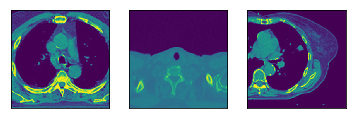

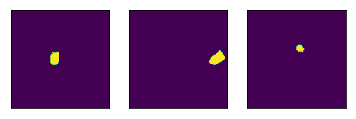

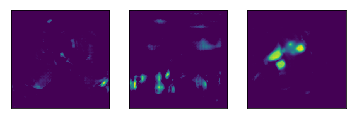

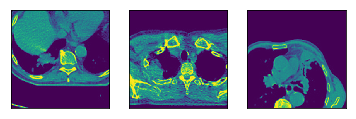

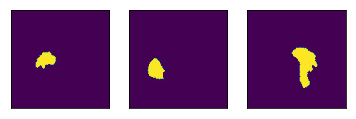

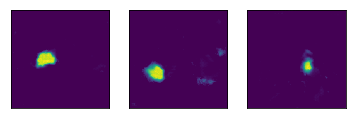

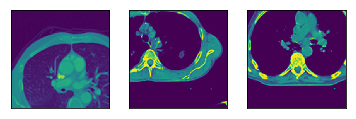

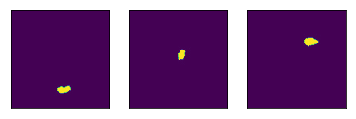

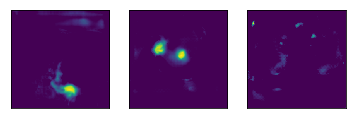

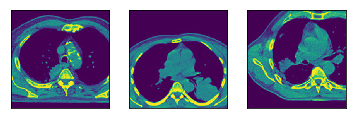

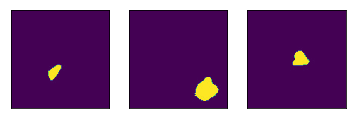

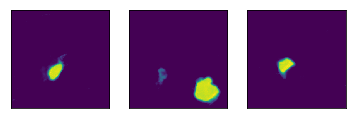

In [19]:
import matplotlib.pyplot as plt

plot_size = 3
plot_num = 2

for num, item in enumerate(test_loader):
    images_tensor = item['image']
    masks_tensor = item['mask']

    inputs = images_tensor.to(device)
    outputs = net(inputs)
    show_out = outputs.detach().cpu().numpy()

    images = images_tensor.numpy()
    masks = masks_tensor.numpy()

    fig = plt.figure()

    for i in range(plot_size):
        ax = fig.add_subplot(1, plot_size, i + 1)
        image = images[i].squeeze()
        ax.imshow(image)
        ax.set_xticks([]), ax.set_yticks([])
        i += 1

    fig = plt.figure()

    for i in range(plot_size):
        ax = fig.add_subplot(1, plot_size, i + 1)
        image = masks[i].squeeze()
        ax.imshow(image)
        ax.set_xticks([]), ax.set_yticks([])
        i += 1
 
    fig = plt.figure()

    for i in range(plot_size):
        ax = fig.add_subplot(1, plot_size, i + 1)
        image = show_out[i].squeeze()
        ax.imshow(image)
        ax.set_xticks([]), ax.set_yticks([])
        i += 1

    if num > plot_num:
        break

In [20]:
for num, item in enumerate(test_loader):
    images_tensor = item['image']
    masks_tensor = item['mask']

    inputs = images_tensor.to(device)
    outputs = net(inputs)
    show_out = outputs.detach().cpu().numpy()

    images = images_tensor.numpy()
    masks = masks_tensor.numpy()

    for i in range(len(images)):
        image = images[i].squeeze()
        cv2.imwrite('./result/' + 'IMAGE' + '_' + str(num) +'_' + str(i+1) + '.jpg', image * 255)
        mask = masks[i].squeeze()
        cv2.imwrite('./result/' + 'GT' + '_' + str(num) +'_' + str(i+1) + '.jpg', mask * 255)
        seg = show_out[i].squeeze()
        cv2.imwrite('./result/' + 'SEG' + '_' + str(num) +'_' + str(i+1) + '.jpg', seg * 255)
        i += 1